In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
url = ('/Users/menusha/Desktop/TestPY/Anemia_NEW_edit.csv')
names = ['RBC', 'HB', 'MCV', 'MCH', 'MCHC', 'RDW', 'class']
anemia = pd.read_csv(url, names=names)

In [3]:
le = LabelEncoder()
le.fit(['IronDef', 'ThalaMinor', 'ACD', 'Normal'])

LabelEncoder()

In [4]:
list(le.classes_)

['ACD', 'IronDef', 'Normal', 'ThalaMinor']

In [5]:
le.transform(['IronDef', 'ThalaMinor', 'ACD', 'Normal']) 

array([1, 3, 0, 2])

In [6]:
anemia['class'] = le.fit_transform(anemia['class'])

In [7]:
anemia['class'].value_counts()

2    128
1     87
3     74
0     67
Name: class, dtype: int64

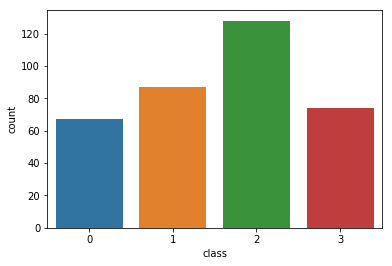

In [8]:
sns.countplot(anemia['class'])

In [9]:
X=anemia.drop('class', axis=1)
y=anemia['class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train[:10]

array([[-0.22861326,  1.44289755,  1.6489949 ,  0.80857931, -0.1848024 ,
        -0.61232058],
       [-0.24833567,  0.49805225,  1.51693891,  1.60287489,  0.55042439,
        -1.16844161],
       [ 0.80681314,  1.58287463,  0.02910812,  1.2057271 , -0.29791421,
        -1.50211423],
       [ 1.51681981, -0.69175293, -0.98332112, -1.63104282,  0.09797713,
         1.16726671],
       [ 0.16583489,  1.51288609,  1.54335011,  0.63837312, -0.07169059,
         0.05502465],
       [-1.1062604 , -1.60160395, -0.15577027, -1.43246892, -1.20280872,
        -0.50109638],
       [-0.37653132, -0.48178731, -1.66120852, -0.72327644, -0.69380556,
         1.0560425 ],
       [-1.19501123, -1.67159249, -1.11537711, -1.37573353, -1.31592053,
         0.9448183 ],
       [-0.45542095, -0.09685034,  0.46049101, -0.24102556, -1.65525597,
         0.05502465],
       [-0.82028549,  0.07812101, -1.74924585, -1.03532113, -1.59870006,
         1.0004304 ]])

In [13]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [14]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        15

   micro avg       0.99      0.99      0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



In [15]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,pred_rfc)
cm

0.9861111111111112

In [16]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [17]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        15

   micro avg       0.99      0.99      0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



In [18]:
cb = accuracy_score(y_test,pred_rfc)
cb

0.9861111111111112

In [25]:
a = input("RBC")
b = input("HB")
c = input("MCV")
d = input("MCH")
e = input("MCHC")
f = input("RDW")

Xnew = [[a,b,c,d,e,f]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew


RBC34
HB45
MCV45
MCH45
MCHC45
RDW45


array([2])

### import pickle
pickle.dump(clf, open('menumodels.pkl','wb'))

In [21]:
anemi_Pi = pickle.load(open('menumodels.pkl','rb'))

In [22]:
anemi_Pi

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
import requests
url = "http://localhost:9000/predict"
data = json.dumps({'RBC': 85, 'HB': 34, 'MCV': 34, 'MCH': 34, 'MCHC': 34, 'RDW': 34})
r = requests.post(url, data)
print(r.json())

NameError: name 'json' is not defined